In [1]:

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# LOAD DATA

In [2]:
img_dims = (96,96,3)
train_path="/content/drive/MyDrive/gender data/training"
test_path="/content/drive/MyDrive/gender data/validation"

# MODEL BUILDING

In [3]:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
    
    width=img_dims[0]
    height=img_dims[1]
    depth=img_dims[2]
    chanDim = 1
    
    inputShape=(height,width,depth)
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0

# IMAGE DATA GENERATOR

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(96, 96),  # All images will be resized to 150x150
        batch_size=10,
        
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(96, 96),
        batch_size=10,
        class_mode='binary')

Found 2307 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
history=model.fit(train_generator,
          validation_data=validation_generator,
          epochs=20)

Epoch 1/20
231/231 [==============================] - 13s 58ms/step - loss: 0.1364 - accuracy: 0.9515 - val_loss: 0.2445 - val_accuracy: 0.9160
Epoch 2/20
231/231 [==============================] - 13s 56ms/step - loss: 0.1441 - accuracy: 0.9419 - val_loss: 0.2245 - val_accuracy: 0.9340
Epoch 3/20
231/231 [==============================] - 13s 56ms/step - loss: 0.1377 - accuracy: 0.9484 - val_loss: 0.3515 - val_accuracy: 0.9020
Epoch 4/20
231/231 [==============================] - 13s 55ms/step - loss: 0.1375 - accuracy: 0.9467 - val_loss: 0.2490 - val_accuracy: 0.9260
Epoch 5/20
231/231 [==============================] - 13s 56ms/step - loss: 0.1521 - accuracy: 0.9454 - val_loss: 0.1914 - val_accuracy: 0.9400
Epoch 6/20
231/231 [==============================] - 13s 56ms/step - loss: 0.1563 - accuracy: 0.9445 - val_loss: 0.1971 - val_accuracy: 0.9400
Epoch 7/20
231/231 [==============================] - 13s 56ms/step - loss: 0.1248 - accuracy: 0.9510 - val_loss: 0.2262 - val_accuracy:

# RESULTS

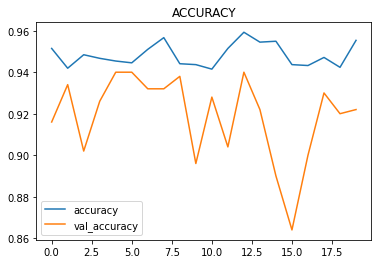

In [24]:
import numpy as np
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))

plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

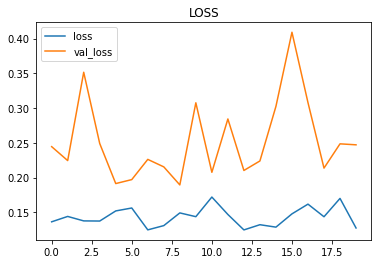

In [25]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))

plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [26]:
import os.path

if os.path.isfile("/content/drive/MyDrive/gender data/gender_classifier.h5") is False:
  model.save("/content/drive/MyDrive/gender data/gender_classifier.h5")

In [28]:
from tensorflow.keras.models import load_model

model_new=load_model("/content/drive/MyDrive/gender data/gender_classifier.h5")

#CHECK FOR YOURSELF

In [37]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(96, 96))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model_new.predict(images, batch_size=10)
  

  
  if classes[0]>0:
    print(fn + " is a WOMAN")
    
  else:
    print(fn + " is a MAN")

Saving 090674.jpg.jpg to 090674.jpg.jpg
Saving 090678.jpg.jpg to 090678.jpg.jpg
Saving 090700.jpg.jpg to 090700.jpg.jpg
090674.jpg.jpg is a MAN
090678.jpg.jpg is a MAN
090700.jpg.jpg is a MAN
